# Customer Churn - Feature Engineering

Let's implement some feature engineering to enhance model training.

In [22]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from scipy import stats


In [23]:
# configure visuals
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Current State of the data

In [24]:
# take a look at our data
df = pd.read_csv('data/processed/customer_churn_clean.csv')
print("\nDataset shape:", df.shape)
df.head()



Dataset shape: (7043, 28)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,PackageTier
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,29.850,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,1889.500,0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,108.150,1,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,1840.750,0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,2.000
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,151.650,1,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000


In [21]:
# drop customer id column as it doesn't provide and valuable information
df.drop(columns='customerID', inplace=True)

KeyError: "['customerID'] not found in axis"

# One-Hot Encoding

One-hot encoding can help translate categorical values into a set of indicator values in which the model can use to identity more complex relationships between features

let's take a look at some of the features in which we can apply one-hot encoding:
* gender
* InternetService
* Contract
* PaymentMethod

In [25]:
# since our gender feature contains two genders (male and female), we can one-hot encode only only of the genders.
# say we one-hot encode female, we would get 1 and 0. 1 would indicate female and 0 would indicate male.
# this would allow use to apply one-hot encoding while also not increasing our parameter size

encoder = OneHotEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

# encode with OneHotEncoder from sklearn
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categorical_cols])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# drop one of the gender columns
one_hot_df.drop(columns='gender_male', inplace=True)

# add columns to previous df
df_new = pd.concat([df, one_hot_df], axis=1)

# drop the old categorical columns
df_new = df_new.drop(categorical_cols, axis=1)

# check my work
df_new.head()
df_new.info()

[]


KeyError: "['gender_male'] not found in axis"

# Binning

During the EDA process, we were able to identify an opportunity to continuous, numerical data into categorical features. 

Let's revisit the histogram of the **MonthlyCharges** feature:

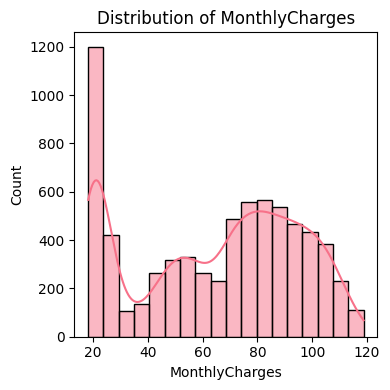

In [26]:
plt.figure(figsize=(4,4))
sns.histplot(data=df_new,x=df_new['MonthlyCharges'],kde=True).set_title("Distribution of MonthlyCharges")
plt.tight_layout()
plt.show()

From the histogram, we can see three clear peaks:
* First peak is between 0 - 30 
* Second peak between 31 - 70
* Third peak between 71 - 100

In [27]:
# define our bins
bins = [0, 30, 70, 100, 120]

"""
    mapping our labels to numeric values
    1 - Basic
    2 - Mid-Tier
    3 - Premium
    4 - High-End
"""
bin_labels = [1, 2, 3, 4]

df_new['PackageTier'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=bin_labels)

df_new.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,InternetService_dsl,InternetService_fiber optic,InternetService_no,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,PackageTier
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,29.850,0,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,1889.500,0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,2
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,108.150,1,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,2
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,1840.750,0,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,2
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,151.650,1,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,3


let's visualize how well our bins look to MonthlyCharges by looking at a box and whisker plot.

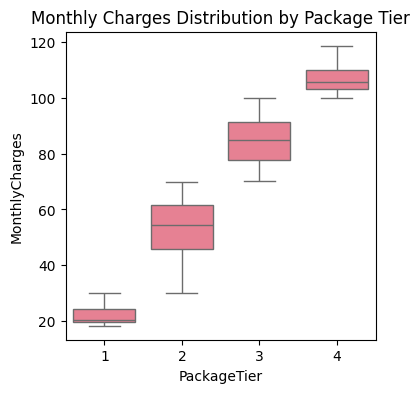

In [28]:
plt.figure(figsize=(4,4))
sns.boxplot(x='PackageTier', y='MonthlyCharges', data=df_new).set_title('Monthly Charges Distribution by Package Tier')
plt.show()

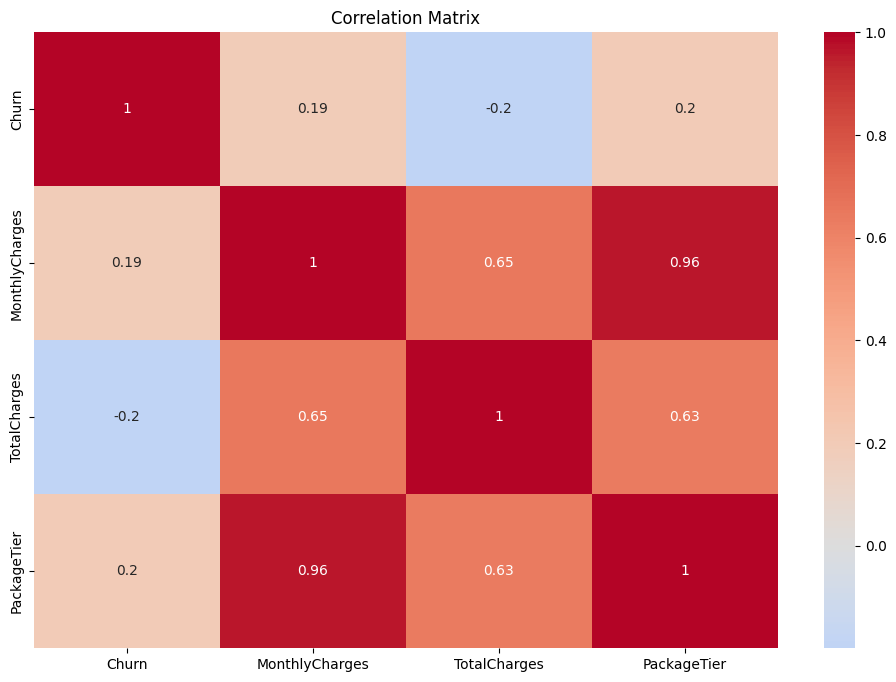

In [29]:
numerical_df = df_new[['Churn','MonthlyCharges','TotalCharges','PackageTier']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0).set_title('Correlation Matrix')
plt.show()

In [30]:
# final look at the data before we start modeling
df_new.head()
df_new.isna().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_female                              0
InternetService_dsl                        0
InternetService_fiber optic                0
InternetService_no                         0
Contract_month-to-month                    0
Contract_one year                          0
Contract_t

In [31]:
# save data
df_new.to_csv('data/processed/customer_churn_clean.csv', index=False)
print("\nCleaned data saved to 'data/processed/customer_churn_clean.csv'")


Cleaned data saved to 'data/processed/customer_churn_clean.csv'
